# Credit Card Fraud Detection

### 데이터 설명(출처: kaggle)
* It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
* Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
* The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
* Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

## 데이터 불러오고 기본 정보 확인

In [2]:
# 데이터 불러오기
credit= pd.read_csv('C:/Users/82102/Desktop/creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# 데이터 정보 확인
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

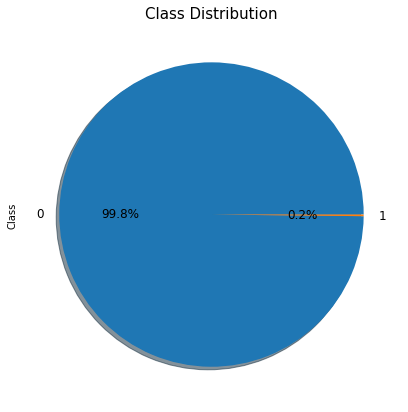

In [4]:
f, ax = plt.subplots(figsize=(7, 7))
credit['Class'].value_counts().plot.pie(shadow= True, ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

ax.set_title('Class Distribution', fontsize = 15);

* 불균형 매우 심함

## EDA 및 시각화

In [5]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.758702e-12,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,-8.252296e-13,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-9.637438e-13,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,8.316234e-13,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.592013e-13,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,4.247308e-13,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-3.050183e-13,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,8.692882e-14,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-1.179710e-12,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


import pandas_profiling
report = pandas_profiling.ProfileReport(credit)
display(report)

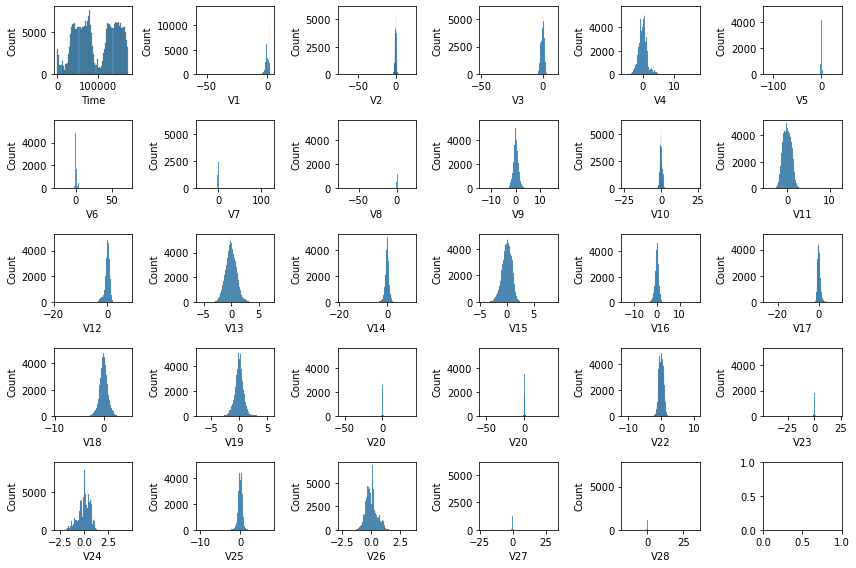

In [7]:
fig,axes = plt.subplots(nrows=5,ncols=6,figsize=(12,8))
sns.histplot(x="Time",data= credit,ax=axes[0,0])
sns.histplot(x="V1", data= credit, ax=axes[0,1])
sns.histplot(x="V2", data= credit,ax=axes[0,2])
sns.histplot(x="V3", data= credit,ax=axes[0,3])
sns.histplot(x="V4", data= credit,ax=axes[0,4])
sns.histplot(x="V5", data= credit,ax=axes[0,5])
sns.histplot(x="V6", data= credit,ax=axes[1,0])
sns.histplot(x="V7", data= credit,ax=axes[1,1])
sns.histplot(x="V8", data= credit,ax=axes[1,2])
sns.histplot(x="V9", data= credit,ax=axes[1,3])
sns.histplot(x="V10", data= credit,ax=axes[1,4])
sns.histplot(x="V11", data= credit,ax=axes[1,5])
sns.histplot(x="V12", data= credit,ax=axes[2,0])
sns.histplot(x="V13", data= credit, ax=axes[2,1])
sns.histplot(x="V14", data= credit,ax=axes[2,2])
sns.histplot(x="V15", data= credit,ax=axes[2,3])
sns.histplot(x="V16", data= credit,ax=axes[2,4])
sns.histplot(x="V17", data= credit, ax=axes[2,5])
sns.histplot(x="V18", data= credit,ax=axes[3,0])
sns.histplot(x="V19", data= credit,ax=axes[3,1])
sns.histplot(x="V20", data= credit,ax=axes[3,2])
sns.histplot(x="V20", data= credit,ax=axes[3,3])
sns.histplot(x="V21", data= credit,ax=axes[3,3])
sns.histplot(x="V22", data= credit,ax=axes[3,4])
sns.histplot(x="V23", data= credit,ax=axes[3,5])
sns.histplot(x="V24", data= credit,ax=axes[4,0])
sns.histplot(x="V25", data= credit,ax=axes[4,1])
sns.histplot(x="V26", data= credit,ax=axes[4,2])
sns.histplot(x="V27", data= credit,ax=axes[4,3])
sns.histplot(x="V28", data= credit,ax=axes[4,4])
plt.tight_layout()